The $\textit{Power Spectral Density}$ (or Power Spectrum) shows, how the power of a
signal is distributed over frequency. If $\textit{H(f)}$ is the Fourier Transform (FT) of
the $\textit{h(t)}$ function and $\Re$ is the real and $\Im$ the imaginary part of $\textit{H}$, the Power
Spectrum (PS) is the squared amplitude [Press et al., 1992]:
    \begin{equation}
        P_{h}(f)=|\Re|^{2}+|\Im|^{2}
    \end{equation}
so the total power is the integral of $P_{h}(f)$ from 0 to $\infty$. The PS is
the plot of power versus frequency. One can recognize from this the signal’s
sources. It is defined also in 2-D functions.

# ONE DIMENSIONAL POWER SPECTRUM

Consider the function $x(t) = sin(2π ∗ 50t) + sin(2π ∗ 120t) + noise$. The noise is mixed with the function components in such a way that you can’t recognize the signal. In order to distinguish the signal’s components
from the noise, you can use the power spectrum. In figure below the PS of the $x(t)$ is illustrated. As we can see the spectrum reveals two prominent peaks at frequencies 50 and 120 Hz, which correspond to the function’s sine components.
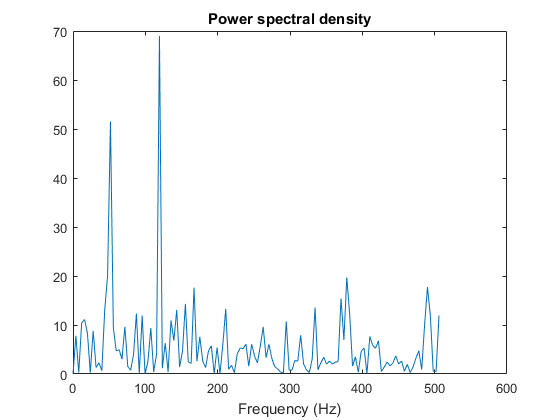

$$f(x)=\sum_{v=0}^{\infty}a_{v}cos[\frac{2\pi vy}{L}]+b_{v}cos[\frac{2\pi vy}{L}]$$


# TWO DIMENSIONAL POWER SPECTRUM 

Consider a digital image with resolution N$\times$N.
The image can be represented by a function h(x,y) which is the intensity of
the pixel with coordinates (x,y). The h(x,y) function is a N$\times$N matrix and x,
y are the number of the column and row, where the pixel with intensity h
is located. The Discrete Fourier Transform (DFT) of a 2-D function h(x, y)
is H(u,v), where u and v are the spatial frequencies (wavelengths) of x and y respectively
and is called Spatial Power Spectrum (SPS). Let P(u,v) be the 2-D SPS, it
is defined as the squared amplitude of H(u,v). The Discrete Fourier Transofrm of an image leads to the formule:

$$f(x,y)=\sum_{u=0}^{\infty}\sum_{v=0}^{\infty}a_{u}cos[\frac{2\pi(ux+vy)}{L}]+b_{v}cos[\frac{2\pi(ux+vy)}{L}]$$




# Power spectrum properties 

$\textit{Property 1}$ SPS of images has two basic properties. First of all it is periodic.The transformation treats an image as if it were part of a periodically replicated array of identical images extending horizontally and vertically to infinity (figure's left panel). So does the 2-D spectrum. Hence, it repeats itself endlessly in both directions with period N (figure's right panel). The DFT computed for a N$\times$N image is a single period from this infinite sequence, so N$\times$N coefficients of the FT are calculated.


$\textit{Property 2}$ The second property comes from the fact that images are real functions.
If a function is real, then |H(u, v)| = |H(−u, −v)|. This means that for
positive frequencies u, v, there are negative frequencies -u, -v, corresponding
to the same value of the spectrum. As a result of this, mirror images of
negative frequencies, which correspond to positive frequencies spectra, are
created. This property is called $\textit{complex conjugate symmetry}$.
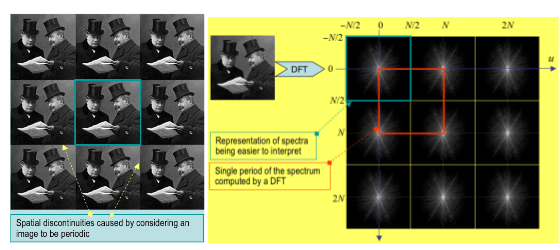

Due to periodicity and conjugate symmetry, the spectrum of a single period is divided in four
equal quadrants, as illustrated in the red box in figure above right panel. In the red box one can see how the frequency increases in a single period spectrum.
The interpretation of the SPS is made much easier if the results of DFT are centered on the point (u=0, v=0), such that the frequencies increase in any
direction away from the center (figure below fourth panel). This can be done by circular
shifting of the four quadrants of the spectrum ($\textit{Shift Theorem}$). As a result of the shift, the
computing sum of DFT starts from -N/2 to N/2, rather than from 0 to N.
In figure's right panel above the blue box, shows how the primal spectrum (red
box) looks like after it has been shifted . The shift is nothing more than a
change in the center of the coordinate system, in the frequency domain, from
(N/2,N/2) to (0,0). The last step to derive a completed Power Spectrum is
to use non-linear mapping, usually log scale. This comes from the fact that
lower frequencies dominate over the mid-range and high-frequency and if we
use linear scaling, the only thing that we are going to see is a bright point in
the middle of the spectrum.
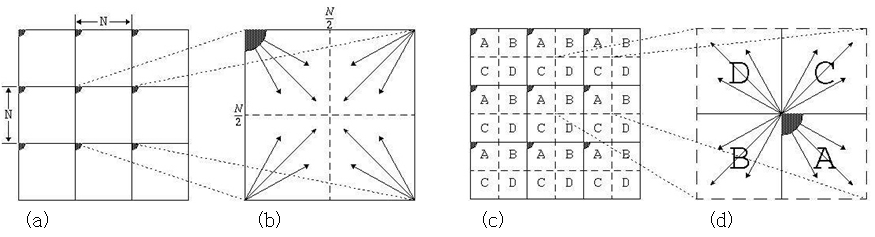

## Examples of SPS

In figure presented below there are two examples of SPS. The upper images are pure sine
waves, while underneath of each image its 2-D spectrum exist. In the Power
Spectra the centred dot is the DC term (zero frequency term), which represents an average brightness across the image. The distances in this picture
correspond to a frequency magnitude hence to a specific length scale of the
real image. High frequencies correspond to low, while low frequencies to high
length scales. As we can see, in the SPS image of the left horizontal sine wave,
two dots are distinguished except the zero frequency dot. They are symmetrically placed and they represent the frequency of the wave. The image is represented by a real function, hence there are two frequencies, a positive
and a negative, that correspond to wave’ s frequency magnitude. The right
sine wave image, is rotated and so the FT is rotated. This spectrum has
white lines across the central axes and they look like a white cross. This
phenomenon is known as $\textit{Gibbs Effect}$ and it takes place, due to the periodicity of FT. As we have discussed above, the transformation repeats an image
endlessly in both direction. The periodicity creates discontinuities causing edge effects. There is an image with pellets and cofee beans illustrated below, while underneath are their spectrum. It is obvious that the pellet’s SPS reveals a circular symmetry; the same does the coffe image. Generally the spectrum follows the symmetry of the real
image. This concentric ring structure is due to each individual pellet and we
would still get this pattern from an image with just one pellet. 



For a detailed description on $\textit{Gibs effect}$ see: https://en.wikipedia.org/wiki/Gibbs_phenomenon

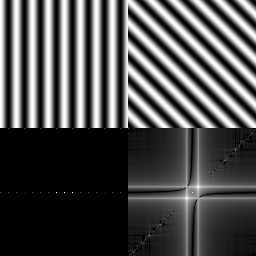
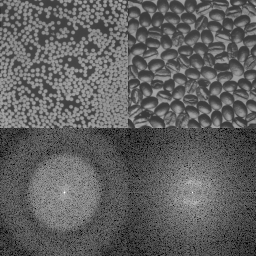

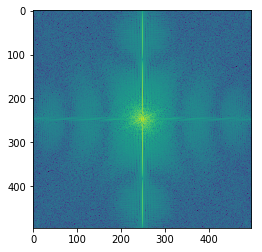

In [60]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 # pip install opencv-python

img = cv2.imread('filaments.png', 0)
DFT = np.fft.fft2(img)
power_spectrum= np.abs(DFT)**2
fshift=np.fft.fftshift(power_spectrum)
plt.imshow(np.log10(fshift))
plt.show()



# Gibbs effect treatment

In order to avoid power's conribution due to the Gibbs effect a common way is to use a window function in FT. The window function reduces the pixels value to zero at the edges.  Hence, an image is descending smmothly and does not create discontinuities between adjacent images. There are some windows functions oftenly used:
1)Bartlett, 2)Hanning, 3)Blackman

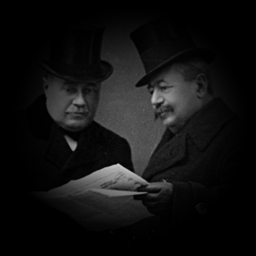

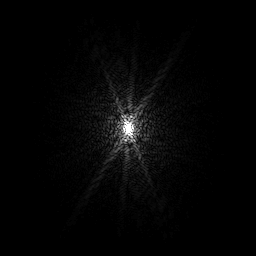

In order to avoid Gibb's effect contamination another way is to use the median value for power as representative of a specific distance scale.




# From 2D to 1D power spectrum

The 2D power spectrum is a powerful tool and by using it dominating structures in an image can be recognized. However, because its interpretation is diffuclt we usually go from 2D to 1D power spectrum. In order to do this we have to make some assumptions. Here we present a method which assumption is that the spectrum is azimuthally symmetric. It is presented in Pingel et al. [2006].

We start with a 2-D image, ”primal” image, in which the pixels’ intensity fluctuations are a function I. The 2D SPS, P(k), is defined by Stanimirovic & Lazarian [2001] as: 
$$P(k)=\int\int \langle I(x)I(x')\rangle e^{-iL \cdot k}dL, \quad L=x-x'$$
which is the Fourier Transform of the autocorrelation function of I; k is the
spatial frequency in units of wavenumber, k∼1/λ, where λ is the length scale
and L the distance between two points in the primal image we transformed,
measured in units of length. First we measure the FT of the image, calculate the square of the modulus of the transform and then shift the 2-D power
image, so that the zero frequency is shifted at the image’s center. As a result, we take the ”transformed” image. The distances in the ”transformed”
image are measured in wavenumbers, k, which means that higher distances
there, corresponds to smaller in the real image. We assume azimuthal symmetry and we take concentric annuli of equal width, in logarithmic intervals,
centered at the center of the image and for each annulus we calculate the
median value. Each median value corresponds to the average power of the
specific annulus, that was calculated, hence at a specific scale distance in the
”primal” image. Based on what we discussed above, the amount of power
of annuli with greater radii probe the power of smaller spatial scales, while
smaller annuli probe the power of larger spatial distance. The use of median
value as the proper one for the power, was motivated by the fact that Pingel et al. [2006], found by simulations, that if the distribution data values is
Gaussian, the average power per annulus is well represented by the median
value. The edge effects, due to Gibbs Effect, introduce a high end tail in
data’s distribution. Finally, the median power is plotted as a function of
spatial scale. 


## From Spatial to frequency domain


We discussed that the frequency domain, for an
image with N$\times$N resolution, ranges from -N/2 to N/2 for every dimension.
The values of -N/2 and N/2 corresponds to the Nyquist frequency, which is defined as $f_{c}=\frac{1}{2D}$, where D is the spatial interval between two pixels. We can arbitrarily set D=1 cm. Then the Nyquist frequency is equal to 0.5$cm^{−1}$. Therefore N/2 pixels in the frequency domain correspond to 0.5$cm^{-1}$. The
amounts are proportional, so for X pixels in frequency domain we can find
its coresponding number of pixels in domain space.

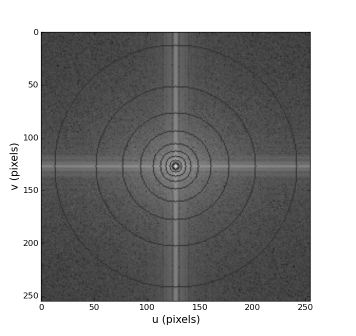

Caption: The 2-D Spectrum of the rice image. The concentric annuli which we use to estimate the power at a certain spatial frequency are illustrated.


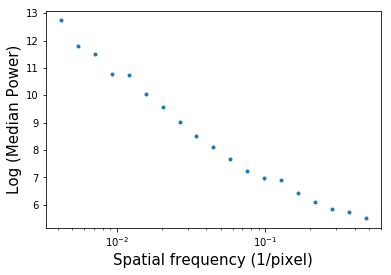

In [74]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import imread
import cv2

#### AZIMUTHALLY AVERAGED POWER SPECTRUM ####
img = cv2.imread('fractal.jpeg', 0)
DFT = np.fft.fft2(img)
power_spectrum = np.abs(DFT)**2
#shifted_power_spectrum = power_spectrum #no shift
shifted_power_spectrum = np.fft.fftshift(power_spectrum)
shifted_power_spectrum = np.log10(shifted_power_spectrum)

N, M= shifted_power_spectrum.shape[0], shifted_power_spectrum.shape[1]
y0, x0= N/2, M/2
minim=min(x0,y0)

########PSD
r1=0.
r2=3.
medians, radii = [], []
while r2<=minim:
    radii.append(r2)
    data=[]
    for x in range (0,M):
        for y in range (0,N):
            if (x-x0)**2+(y-y0)**2>=r1**2 and (x-x0)**2+(y-y0)**2<=r2**2:
                data.append(shifted_power_spectrum[y][x])
    medians.append(np.median(data)) 
    r1=r2
    r2=1.3*r2

medians, k_radii = np.array(medians), np.array(radii) 
frequency = k_radii/N
r_radii = 1/frequency

fig=plt.figure()
ax=fig.add_subplot(111)
#ax2 = ax.twiny()
f_size=15
ax.set_xlabel('Spatial frequency (1/pixel)', fontsize=f_size)
ax.set_ylabel('Log (Median Power)', fontsize=f_size)
#ax2.set_xlabel('Distance (pixel)', fontsize=f_size)
ax.set_xscale('log', fontsize=f_size)
#ax2.set_xscale('log', fontsize=f_size)
ax.set_yscale('linear',fontsize=f_size)
ax.plot(frequency, medians, '.')
plt.show()

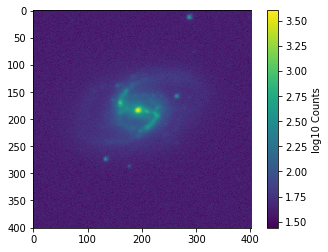

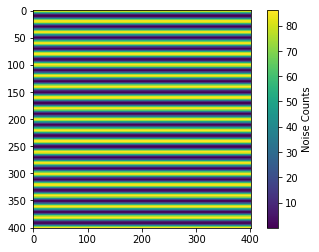

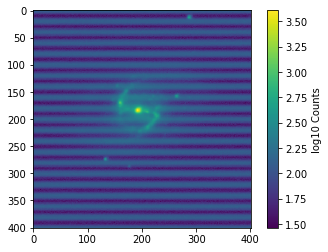

In [5]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import fftpack, ndimage
import pyfits
import operator

image_name = "NGC2512_6661.fits"
image = pyfits.open(image_name)
image_data = image[0].data
header = image[0].header
sh = np.shape(image_data)

med_counts = np.median(image_data)

plt.imshow(np.log10(image_data), cmap=plt.cm.viridis, interpolation='nearest')
cbar=plt.colorbar()
cbar.set_label('log10 Counts')
plt.show()

# Create noise
f0 = 0.04987
phi = np.pi/2
A = med_counts

noise_data = np.zeros((sh[0], sh[1]))
for i in range(sh[0]):
    for j in range(sh[1]):
        noise_data[i,j] = A * np.sin(2 * np.pi * f0 * i + phi) + med_counts
        
plt.imshow(noise_data, cmap=plt.cm.viridis, interpolation='nearest')
cbar=plt.colorbar()
cbar.set_label('Noise Counts')
plt.show()

noisy_image = image_data + noise_data # Add noise to initial image

plt.imshow(np.log10(noisy_image), cmap=plt.cm.viridis, interpolation='nearest')
cbar=plt.colorbar()
cbar.set_label('log10 Counts')
plt.show()

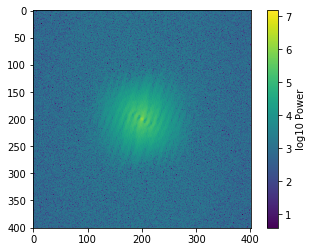

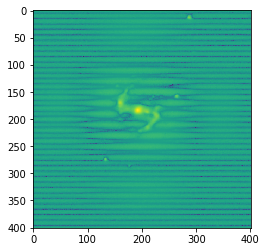

In [6]:
DFT = np.fft.fft2(noisy_image)
fshift = np.fft.fftshift(DFT)
power_spectrum = np.abs(fshift)
plt.imshow(np.log10(power_spectrum), cmap=plt.cm.viridis, interpolation='nearest')
cbar=plt.colorbar()
cbar.set_label('log10 Power')
plt.show()

# Removing low frequencies approach
crow,ccol = np.int(sh[0]/2) , np.int(sh[1]/2)
freq_cutoff = 2
fshift[crow-freq_cutoff:crow+freq_cutoff, ccol-freq_cutoff:ccol+freq_cutoff] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(np.log10(img_back), cmap=plt.cm.viridis, interpolation='nearest')
plt.show()

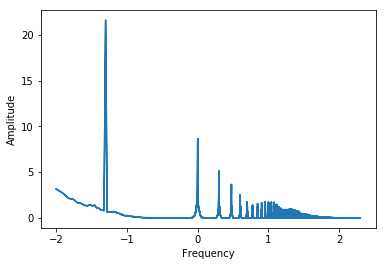

Frequency found f0 = 0.0498753117207 with amplitude A = 21.5943287211
Initial noise frequency f0 = 0.04987 with amplitude A = 21.5162010193


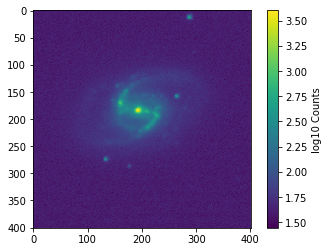

In [7]:
# 1D approach
One_D = noisy_image.ravel()
DFT1 = np.fft.fft(One_D)
freq = np.fft.fftfreq(One_D.size)
frequency = abs(freq) * sh[0]
amplit = np.abs(DFT1) / sh[0] / sh[1]
amplit = amplit[frequency > f0 / 5]
frequency = frequency[frequency > f0 / 5]
plt.plot(np.log10(frequency), amplit)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

index, value = max(enumerate(amplit), key=operator.itemgetter(1))
found_freq = frequency[index]
print("Frequency found f0 =", found_freq, "with amplitude A =" , value)
print("Initial noise frequency f0 =", f0, "with amplitude A =", A/2.0)

recovered_noise = np.zeros((sh[0], sh[1]))
for i in range(sh[0]):
    for j in range(sh[1]):
        recovered_noise[i,j] = 2 * value * np.sin(2 * np.pi * found_freq * i + phi) + med_counts

recovered_image = noisy_image - recovered_noise
plt.imshow(np.log10(recovered_image), cmap=plt.cm.viridis, interpolation='nearest')
cbar=plt.colorbar()
cbar.set_label('log10 Counts')
plt.show()

## References

1) https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic1.htm 

2) http://www.cs.unm.edu/~brayer/vision/fourier.html

3) Pingel N. M. et al., 2006, ApJ, 779, 36

4) Stanimirovic S. & Lazarian A., 2001, ApJ, 551, L53